In [2]:
suppressMessages(require(tidyverse))
suppressMessages(require(data.table))

The tsv file is generated by the following commands
```
/oak/stanford/groups/mrivas/ukbb24983/sqc/population_stratification]$ cat ukb24983_GWAS_covar.20190809.phe | cut -f1,50,51,90 | gzip -9 > ~/ukb24983_GWAS_covar.20190809.plot.tsv.gz
```

In [21]:
df <- fread(
    'ukb24983_GWAS_covar.20190809.plot.tsv',
    sep='\t'
)

In [22]:
df %>% head()

FID,Global_PC1,Global_PC2,population
<int>,<dbl>,<dbl>,<chr>
2502845,-12.1725,5.39163,white_british
2314965,-13.0245,6.41514,white_british
1142584,-11.4712,3.48383,white_british
3665122,-12.1327,4.02976,white_british
4377492,-12.2171,3.50821,white_british
2652670,-11.5847,5.41131,NA


In [37]:
p <- df %>% 
mutate(
    is_white_british = if_else(population == 'white_british', T, F)
) %>%
replace_na(list(is_white_british = F)) %>%
ggplot(aes(x = Global_PC1, y = Global_PC2, color=as.factor(is_white_british))) +
geom_point(alpha=.025) +
theme_bw() + theme(legend.position="bottom") +
guides(colour = guide_legend(override.aes = list(alpha = 1), nrow=2, byrow=TRUE)) +
labs(title='Genotype PCs', color='White British', x = 'PC1', y = 'PC2')  +
scale_color_manual(values=c("gray", "red"))


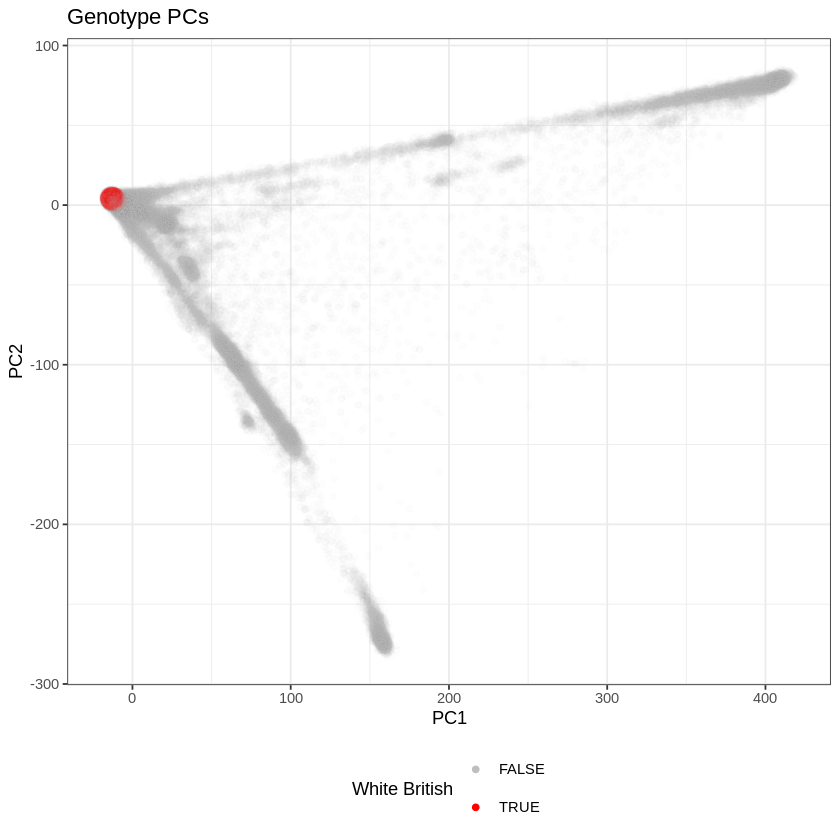

In [38]:
p

In [41]:
ggsave('pop_stratification.png', p)


Saving 6.67 x 6.67 in image
